In [9]:
from tensorflow.python.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.preprocessing.image import load_img
from tensorflow.python.keras.preprocessing.image import img_to_array
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.applications.vgg16 import decode_predictions

from IPython.display import display_png

import numpy as np

In [2]:
#모델 불러오기

model = VGG16()
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________

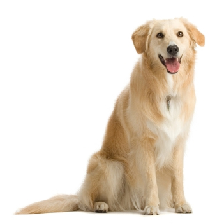

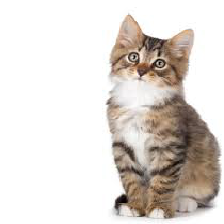

In [11]:
# 예측할 테스트 이미지 불러오기

img_dog = load_img('img/dog.jpeg', target_size=(224,224))
img_cat = load_img('img/cat.jpeg', target_size=(224,224))

display_png(img_dog)
display_png(img_cat)

In [7]:
#load_img로 불러온 파일은 Pillow상의 데이터 포맷을 따르므로
#numpy.ndarray 형식으로 전환할 필요가 있다

arr_dog = img_to_array(img_dog)
arr_cat = img_to_array(img_cat)

In [8]:
#vgg16에 알맞는 형태로 데이터를 처리

arr_cat = preprocess_input(arr_cat)
arr_dog = preprocess_input(arr_dog)

In [12]:
#두개의 화상파일을 하나의 배열로 합침

arr_input = np.stack([arr_dog, arr_cat])
print('shape of arr_input', arr_input.shape)

shape of arr_input (2, 224, 224, 3)


In [13]:
#모든 클래스에 대한 예측 결과를 probs에 저장

probs = model.predict(arr_input)
print('shape of probs:', probs.shape)
probs

shape of probs: (2, 1000)


array([[3.34467707e-08, 5.67153400e-08, 1.08110445e-08, ...,
        2.35731146e-09, 4.21789281e-07, 3.79893572e-06],
       [6.91783555e-07, 7.00311693e-06, 6.36601726e-07, ...,
        3.67594140e-07, 2.56820877e-05, 3.87668188e-05]], dtype=float32)

In [14]:
#1000개의 클래스에 대한 확률을 전부 포함하므로
#상위 5개의 클래스만을 추출

results = decode_predictions(probs)

In [16]:
#개의 예측 결과

results[0]

[('n02099601', 'golden_retriever', 0.9373383),
 ('n02099712', 'Labrador_retriever', 0.045893762),
 ('n02104029', 'kuvasz', 0.005600685),
 ('n02099267', 'flat-coated_retriever', 0.0017231025),
 ('n02108551', 'Tibetan_mastiff', 0.0007687327)]

In [17]:
# 고양이의 예측 결과

results[1]

[('n02123045', 'tabby', 0.773048),
 ('n02123159', 'tiger_cat', 0.105414264),
 ('n02124075', 'Egyptian_cat', 0.08668413),
 ('n02123394', 'Persian_cat', 0.006427029),
 ('n03223299', 'doormat', 0.002006265)]